# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [44]:
df = sns.load_dataset('titanic')

In [45]:
df.shape

(891, 15)

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
df.dropna(inplace=True)

In [48]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [49]:
df['pclass'].value_counts()

pclass
1    157
2     15
3     10
Name: count, dtype: int64

In [50]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [51]:
df['sex'].value_counts()

sex
male      94
female    88
Name: count, dtype: int64

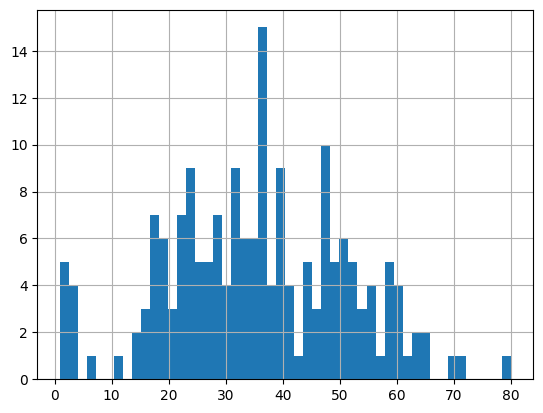

In [52]:
df['age'].hist(bins=50);

## Data Pre-processing

In [53]:
X = df[['pclass', 'sex', 'age']]

In [54]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [55]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\informatika\AppData\Local\Temp\ipykernel_14700\3256440739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = lb.fit_transform(X['sex'])


In [56]:
a = np.array(["male",  "female", "male"])
s = {"sex" : ["male","None",  "female", "male", "male", "female"]}
d = pd.DataFrame(s)
lb.transform(d)
m = pd.get_dummies(d, dtype=int)
m

,sex_None,sex_female,sex_male
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0


In [57]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [58]:
X.shape

(182, 3)

In [59]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int32  
 2   age     182 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [61]:
y = df['survived']

In [62]:
y.value_counts()

survived
1    123
0     59
Name: count, dtype: int64

# Fit Model

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

## Decision Tree

In [67]:
clf = DecisionTreeClassifier(random_state=42)

In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9685

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.96      0.98        82

    accuracy                           0.97       127
   macro avg       0.96      0.97      0.97       127
weighted avg       0.97      0.97      0.97       127


Confusion Matrix: 
 [[44  1]
 [ 3 79]]

ROC AUC: 0.9706

Average Accuracy: 	 0.7859
Accuracy SD: 		 0.1379
Test Result:

accuracy score: 0.6909

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.82      0.76      0.78        41

    accuracy                           0.69        55
   macro avg       0.61      0.63      0.62        55
weighted avg       0.71      0.69      0.70        55


Confusion Matrix: 
 [[ 7  7]
 [10 31]]

ROC AUC: 0.6280



***

## Bagging (oob_score=False)

In [77]:
clf1 = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(base_estimator=clf1, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [78]:
bag_clf.fit(X_train, y_train)

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [80]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9685

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.96      0.99      0.98        82

    accuracy                           0.97       127
   macro avg       0.97      0.96      0.97       127
weighted avg       0.97      0.97      0.97       127


Confusion Matrix: 
 [[42  3]
 [ 1 81]]

ROC AUC: 0.9606



C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

Average Accuracy: 	 0.7692
Accuracy SD: 		 0.1369
Test Result:

accuracy score: 0.6909

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.82      0.76      0.78        41

    accuracy                           0.69        55
   macro avg       0.61      0.63      0.62        55
weighted avg       0.71      0.69      0.70        55


Confusion Matrix: 
 [[ 7  7]
 [10 31]]

ROC AUC: 0.6280



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [73]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [74]:
bag_clf.fit(X_train, y_train)

C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [75]:
bag_clf.oob_score_

0.7637795275590551

In [76]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9685

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.96      0.98        82

    accuracy                           0.97       127
   macro avg       0.96      0.97      0.97       127
weighted avg       0.97      0.97      0.97       127


Confusion Matrix: 
 [[44  1]
 [ 3 79]]

ROC AUC: 0.9706

Average Accuracy: 	 0.7859
Accuracy SD: 		 0.1379
Test Result:

accuracy score: 0.6909

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.82      0.76      0.78        41

    accuracy                           0.69        55
   macro avg       0.61      0.63      0.62        55
weighted avg       0.71      0.69      0.70        55


Confusion Matrix: 
 [[ 7  7]
 [10 31]]

ROC AUC: 0.6280



***